In [46]:
import pandas as pd
import numpy as np
import pickle
import re
import datetime as dt

import matplotlib.pyplot as plt

from pybaseball import *

import psycopg2
import pandas.io.sql as psql
from sqlalchemy import create_engine

import seaborn as sb
plt.style.use("ggplot")

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

In [5]:
games_18 = pd.read_pickle('../pickles/2018_apps_ids.pkl')
games_17 = pd.read_pickle('../pickles/2017_apps_ids.pkl')
games_16 = pd.read_pickle('../pickles/2016_apps_ids.pkl')
games_15 = pd.read_pickle('../pickles/2015_apps_ids.pkl')


games_18['date'] = pd.to_datetime(games_18['date'])
games_17['date'] = pd.to_datetime(games_17['date'])
games_16['date'] = pd.to_datetime(games_16['date'])
games_15['date'] = pd.to_datetime(games_15['date'])


games_18 = games_18.sort_values(by=['key_mlbam', 'date'])
games_17 = games_17.sort_values(by=['key_mlbam', 'date'])
games_16 = games_16.sort_values(by=['key_mlbam', 'date'])
games_15 = games_15.sort_values(by=['key_mlbam', 'date'])

inj_18 = pd.read_pickle('../pickles/2018_inj_ids.pkl')
inj_17 = pd.read_pickle('../pickles/2017_inj_ids.pkl')
inj_16 = pd.read_pickle('../pickles/2016_inj_ids.pkl')
inj_15 = pd.read_pickle('../pickles/2015_inj_ids.pkl')

merge_18 = games_18.merge(inj_18, on='key_mlbam', how='left')
merge_17 = games_17.merge(inj_17, on='key_mlbam', how='left')
merge_16 = games_16.merge(inj_16, on='key_mlbam', how='left')
merge_15 = games_15.merge(inj_15, on='key_mlbam', how='left')

merge_18 = merge_18.sort_values(by=['key_mlbam', 'date'])
merge_17 = merge_17.sort_values(by=['key_mlbam', 'date'])
merge_16 = merge_16.sort_values(by=['key_mlbam', 'date'])
merge_15 = merge_15.sort_values(by=['key_mlbam', 'date'])

merge_18['days_preceeding'] = merge_18['startdate'] - merge_18['date']
merge_17['days_preceeding'] = merge_17['startdate'] - merge_17['date']
merge_16['days_preceeding'] = merge_16['startdate'] - merge_16['date']
merge_15['days_preceeding'] = merge_15['startdate'] - merge_15['date']

merge_18['days_rest'] = merge_18['date'] - merge_18['date'].shift()
merge_17['days_rest'] = merge_17['date'] - merge_17['date'].shift()
merge_16['days_rest'] = merge_16['date'] - merge_16['date'].shift()
merge_15['days_rest'] = merge_15['date'] - merge_15['date'].shift()

merge_18_inj = merge_18[merge_18['days_preceeding'].notnull()]
merge_17_inj = merge_17[merge_17['days_preceeding'].notnull()]
merge_16_inj = merge_16[merge_16['days_preceeding'].notnull()]
merge_15_inj = merge_15[merge_15['days_preceeding'].notnull()]

merge_18_noinj = merge_18[merge_18['days_preceeding'].isnull()]
merge_17_noinj = merge_17[merge_17['days_preceeding'].isnull()]
merge_16_noinj = merge_16[merge_16['days_preceeding'].isnull()]
merge_15_noinj = merge_15[merge_15['days_preceeding'].isnull()]

id_list_18 = merge_18_inj['key_mlbam'].unique().tolist()
id_list_17 = merge_17_inj['key_mlbam'].unique().tolist()
id_list_16 = merge_16_inj['key_mlbam'].unique().tolist()
id_list_15 = merge_15_inj['key_mlbam'].unique().tolist()

frames_18 = pd.DataFrame()
for id in id_list_18:
    frame = merge_18_inj[merge_18_inj['key_mlbam'] == id]
    try:
        inj_index = frame.index[frame['days_preceeding'] < dt.timedelta(0)][0]-1
    except:
        inj_index = frame.tail(1).index.item()
    frame.at[inj_index, 'injured?'] = 1
    frames_18 = frames_18.append(frame)
    frames_18 = frames_18.drop_duplicates(keep=False)
df_18 = frames_18.append(merge_18_noinj)
df_18 = df_18.sort_values(by=['key_mlbam', 'date'])

frames_17 = pd.DataFrame()
for id in id_list_17:
    frame = merge_17_inj[merge_17_inj['key_mlbam'] == id]
    try:
        inj_index = frame.index[frame['days_preceeding'] < dt.timedelta(0)][0]-1
    except:
        inj_index = frame.tail(1).index.item()
    frame.at[inj_index, 'injured?'] = 1
    frames_17 = frames_17.append(frame)
    frames_17 = frames_17.drop_duplicates(keep=False)
df_17 = frames_17.append(merge_17_noinj)
df_17 = df_17.sort_values(by=['key_mlbam', 'date'])


frames_16 = pd.DataFrame()
for id in id_list_16:
    frame = merge_16_inj[merge_16_inj['key_mlbam'] == id]
    try:
        inj_index = frame.index[frame['days_preceeding'] < dt.timedelta(0)][0]-1
    except:
        inj_index = frame.tail(1).index.item()
    frame.at[inj_index, 'injured?'] = 1
    frames_16 = frames_16.append(frame)
    frames_16 = frames_16.drop_duplicates(keep=False)
df_16 = frames_16.append(merge_16_noinj)
df_16 = df_16.sort_values(by=['key_mlbam', 'date'])


frames_15 = pd.DataFrame()
for id in id_list_15:
    frame = merge_15_inj[merge_15_inj['key_mlbam'] == id]
    try:
        inj_index = frame.index[frame['days_preceeding'] < dt.timedelta(0)][0]-1
    except:
        inj_index = frame.tail(1).index.item()
    frame.at[inj_index, 'injured?'] = 1
    frames_15 = frames_15.append(frame)
    frames_15 = frames_15.drop_duplicates(keep=False)
df_15 = frames_15.append(merge_15_noinj)
df_15 = df_15.sort_values(by=['key_mlbam', 'date'])


In [24]:
games_15.head()

,name,age,#days,lev,tm,g,gs,w,l,sv,ip,h,r,er,bb,so,hr,hbp,era,ab,2b,3b,ibb,gdp,sf,sb,cs,po,bf,pit,str,stl,sts,gb/fb,ld,pu,whip,babip,so9,so/w,date,first,last,key_bbref,key_fangraphs,key_mlbam,key_retro,mlb_played_first,mlb_played_last,name_first,name_last
34,bartolocolon,42,1460,MLB-NL,New York,1,1,1.0,NaN,NaN,6.0,3,1,1,1,8,1,0,1.50,22,0,0,0,0,0,0,0,0,23,86,0.69,0.21,0.15,0.64,0.07,0.07,0.667,0.154,12.0,8.0,2015-04-06,bartolocolon,bartolocolon,colonba01,375.0,112526.0,colob001,1997.0,2018.0,bartolo,colon
675,bartolocolon,42,1454,MLB-NL,New York,1,1,1.0,NaN,NaN,7.0,6,3,3,0,5,1,0,3.86,27,1,1,0,0,0,0,0,0,27,77,0.78,0.21,0.06,0.33,0.33,0.05,0.857,0.238,6.4,NaN,2015-04-12,bartolocolon,bartolocolon,colonba01,375.0,112526.0,colob001,1997.0,2018.0,bartolo,colon
1180,bartolocolon,42,1449,MLB-NL,New York,1,1,1.0,NaN,NaN,7.0,6,1,1,0,5,1,0,1.29,26,2,0,0,1,0,0,0,0,26,91,0.73,0.21,0.05,0.43,0.29,0.05,0.857,0.250,6.4,NaN,2015-04-17,bartolocolon,bartolocolon,colonba01,375.0,112526.0,colob001,1997.0,2018.0,bartolo,colon
1849,bartolocolon,42,1443,MLB-NL,New York,1,1,1.0,NaN,NaN,6.0,7,3,3,0,5,0,0,4.50,23,2,0,0,1,1,0,1,0,24,88,0.66,0.23,0.07,0.22,0.33,0.11,1.167,0.368,7.5,NaN,2015-04-23,bartolocolon,bartolocolon,colonba01,375.0,112526.0,colob001,1997.0,2018.0,bartolo,colon
2487,bartolocolon,42,1437,MLB-NL,New York,1,1,NaN,1.0,NaN,6.2,9,4,4,0,2,1,0,5.40,26,2,0,0,1,1,0,0,0,29,91,0.70,0.26,0.03,0.48,0.28,0.04,1.350,0.333,2.7,NaN,2015-04-29,bartolocolon,bartolocolon,colonba01,375.0,112526.0,colob001,1997.0,2018.0,bartolo,colon


In [23]:
inj_15.head()

,name,posititon,team,injury,days,year,list,startdate,enddate,moneyearned,last,first,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,neftalifeliz,RP,ARI,Illness,125,2015,15,2015-11-03,7/2,2817500,feliz,neftali,feliz,neftali,491703.0,felin001,felizne01,18.0,2009.0,2017.0
1,carlosmartinez,RP,STL,Shoulder,6,2015,60,2015-09-30,10/5,17052,martinez,carlos,martinez,carlos,593372.0,martc006,martica04,11682.0,2013.0,2018.0
4,logandarnell,RP,WSH,Illness,11,2015,60,2015-09-25,10/5,30503,darnell,logan,darnell,logan,592244.0,darnl001,darnelo01,11261.0,2014.0,2014.0
5,dylanbundy,SP,BAL,Shoulder,12,2015,60,2015-09-24,10/5,29184,bundy,dylan,bundy,dylan,605164.0,bundd001,bundydy01,12917.0,2012.0,2018.0
6,michaelblazek,RP,ARI,Hand,55,2015,60,2015-09-22,10/515-day,152790,blazek,michael,blazek,michael,518468.0,blazm001,blazemi01,9654.0,2013.0,2017.0


In [22]:
merge_15.head()

,name_x,age,#days,lev,tm,g,gs,w,l,sv,ip,h,r,er,bb,so,hr,hbp,era,ab,2b,3b,ibb,gdp,sf,sb,cs,po,bf,pit,str,stl,sts,gb/fb,ld,pu,whip,babip,so9,so/w,date,first_x,last_x,key_bbref_x,key_fangraphs_x,key_mlbam,key_retro_x,mlb_played_first_x,mlb_played_last_x,name_first_x,name_last_x,name_y,posititon,team,injury,days,year,list,startdate,enddate,moneyearned,last_y,first_y,name_last_y,name_first_y,key_retro_y,key_bbref_y,key_fangraphs_y,mlb_played_first_y,mlb_played_last_y,days_preceeding,days_rest
0,bartolocolon,42,1460,MLB-NL,New York,1,1,1.0,NaN,NaN,6.0,3,1,1,1,8,1,0,1.50,22,0,0,0,0,0,0,0,0,23,86,0.69,0.21,0.15,0.64,0.07,0.07,0.667,0.154,12.0,8.0,2015-04-06,bartolocolon,bartolocolon,colonba01,375.0,112526.0,colob001,1997.0,2018.0,bartolo,colon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
1,bartolocolon,42,1454,MLB-NL,New York,1,1,1.0,NaN,NaN,7.0,6,3,3,0,5,1,0,3.86,27,1,1,0,0,0,0,0,0,27,77,0.78,0.21,0.06,0.33,0.33,0.05,0.857,0.238,6.4,NaN,2015-04-12,bartolocolon,bartolocolon,colonba01,375.0,112526.0,colob001,1997.0,2018.0,bartolo,colon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,6 days
2,bartolocolon,42,1449,MLB-NL,New York,1,1,1.0,NaN,NaN,7.0,6,1,1,0,5,1,0,1.29,26,2,0,0,1,0,0,0,0,26,91,0.73,0.21,0.05,0.43,0.29,0.05,0.857,0.250,6.4,NaN,2015-04-17,bartolocolon,bartolocolon,colonba01,375.0,112526.0,colob001,1997.0,2018.0,bartolo,colon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,5 days
3,bartolocolon,42,1443,MLB-NL,New York,1,1,1.0,NaN,NaN,6.0,7,3,3,0,5,0,0,4.50,23,2,0,0,1,1,0,1,0,24,88,0.66,0.23,0.07,0.22,0.33,0.11,1.167,0.368,7.5,NaN,2015-04-23,bartolocolon,bartolocolon,colonba01,375.0,112526.0,colob001,1997.0,2018.0,bartolo,colon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,6 days
4,bartolocolon,42,1437,MLB-NL,New York,1,1,NaN,1.0,NaN,6.2,9,4,4,0,2,1,0,5.40,26,2,0,0,1,1,0,0,0,29,91,0.70,0.26,0.03,0.48,0.28,0.04,1.350,0.333,2.7,NaN,2015-04-29,bartolocolon,bartolocolon,colonba01,375.0,112526.0,colob001,1997.0,2018.0,bartolo,colon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,6 days


In [35]:
df_18 = pd.read_pickle('../pickles/2018_games_labeled_1.pkl')
df_17 = pd.read_pickle('../pickles/2017_games_labeled_1.pkl')
df_16 = pd.read_pickle('../pickles/2016_games_labeled_1.pkl')
df_15 = pd.read_pickle('../pickles/2015_games_labeled_1.pkl')
df = pd.read_pickle('../pickles/labeled_games_agg.pkl')


In [37]:
df['injured?'].sum() / len(df)

0.010713892592003718

In [38]:
df_noinj = df[df['days_preceeding'] == 0]
df_inj = df[df['days_preceeding'] != 0]

In [39]:
df_noinj.groupby(by='key_mlbam').mean().describe()

,#days,2b,3b,ab,age,appearance_yr,babip,bb,bf,cs,days,days_preceeding,days_rest,er,era,g,gb/fb,gdp,gs,h,hbp,hr,ibb,injured?,ip,key_fangraphs_x,key_fangraphs_y,l,ld,mlb_played_first_x,mlb_played_first_y,mlb_played_last_x,mlb_played_last_y,pit,po,pu,r,sb,sf,so,so/w,so9,stl,str,sts,sv,w,whip,year
count,1196.000000,1196.000000,1196.000000,1196.000000,1196.000000,1196.000000,1194.000000,1196.000000,1196.000000,1196.000000,10.000000,1196.0,1196.000000,1196.000000,1196.000000,1196.000000,1195.000000,1196.000000,1196.000000,1196.000000,1196.000000,1196.000000,1196.000000,1196.000000,1196.000000,1196.000000,10.000000,827.0,1195.000000,1196.000000,10.000000,1196.000000,10.000000,1196.000000,1196.000000,1195.000000,1196.000000,1196.000000,1196.000000,1196.000000,1112.000000,1194.000000,1196.000000,1196.000000,1196.000000,281.000000,792.0,1194.000000,10.000000
mean,813.795879,0.495465,0.049309,8.721545,27.376719,13.222725,0.291481,0.891487,9.843212,0.041317,66.300000,0.0,39.107163,1.269904,inf,1.000755,0.435591,0.198774,0.252517,2.395954,0.103555,0.352888,0.048092,0.002757,2.098590,10590.822742,8613.200000,1.0,0.260239,2013.282609,2011.000000,2017.555184,2017.100000,37.893094,0.012249,0.072076,1.369268,0.123561,0.072728,1.825106,1.388656,7.549742,0.162701,0.633983,0.097693,1.000483,1.0,1.747774,2016.000000
std,386.504446,0.490516,0.092242,6.813568,3.570600,10.851994,0.102477,0.759408,7.541860,0.074616,41.400617,0.0,51.991139,1.104977,NaN,0.010475,0.130283,0.227320,0.380593,1.914728,0.152938,0.364920,0.083246,0.050379,1.782670,4804.807172,4183.722872,0.0,0.092482,4.096583,4.921608,1.229130,1.523884,29.094503,0.041651,0.064914,1.171418,0.210391,0.122432,1.632712,1.025603,3.294729,0.038930,0.056564,0.038126,0.003299,0.0,0.911290,1.054093
min,191.000000,0.000000,0.000000,1.000000,19.217391,1.000000,0.000000,0.000000,1.000000,0.000000,23.000000,0.0,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,512.000000,1.0,0.000000,1998.000000,1999.000000,2015.000000,2015.000000,1.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.190000,0.000000,1.000000,1.0,0.000000,2015.000000
25%,487.777299,0.146725,0.000000,3.637032,25.000000,3.500000,0.250538,0.350589,4.089545,0.000000,35.500000,0.0,9.714738,0.403101,4.573373,1.000000,0.370417,0.038247,0.000000,0.912938,0.000000,0.090909,0.000000,0.000000,0.849482,6813.500000,6003.250000,1.0,0.223836,2011.000000,2009.250000,2017.000000,2016.000000,16.105592,0.000000,0.039443,0.453396,0.000000,0.000000,0.802804,0.722167,6.119805,0.146873,0.612801,0.078661,1.000000,1.0,1.333308,2015.000000
50%,828.569444,0.283702,0.013955,5.000000,26.979150,10.567568,0.287610,0.600000,5.750000,0.009804,56.500000,0.0,16.022222,0.836667,7.875000,1.000000,0.439286,0.106222,0.000000,1.494048,0.048696,0.200000,0.027588,0.000000,1.099537,11358.000000,9125.500000,1.0,0.255714,2014.000000,2012.500000,2018.000000,2017.500000,22.000000,0.000000,0.064444,0.894737,0.064516,0.032877,1.142225,1.037523,7.734896,0.165189,0.637013,0.098775,1.000000,1.0,1.572390,2016.000000
75%,1113.467330,0.822051,0.066667,13.405263,29.434586,18.914062,0.325681,1.344984,15.104167,0.055556,83.500000,0.0,38.759740,2.080833,inf,1.000000,0.502658,0.315789,0.500000,3.931723,0.145608,0.571429,0.064516,0.000000,3.200000,14508.500000,11530.750000,1.0,0.290000,2016.000000,2013.000000,2018.000000,2018.000000,58.267857,0.005063,0.092163,2.250000,0.166667,0.103182,2.421875,1.861607,9.319375,0.180052,0.660131,0.120313,1.000000,1.0,1.916981,2016.750000
max,1456.500000,4.000000,1.000000,25.484375,41.000000,41.000000,1.000000,7.000000,27.468750,1.000000,152.000000,0.0,182.000000,7.000000,inf,1.333333,1.000000,1.500000,1.000000,10.000000,1.000000,3.000000,1.000000,1.000000,7.250000,19990.000000,13685.000000,1.0,1.000000,2018.000000,2017.000000,2019.000000,2019.000000,110.500000,1.000000,1.000000,8.000000,4.000000,1.000000,9.121212,7.333333,27.000000,0.500000,1.000000,0.

In [40]:
df_inj.groupby(by='key_mlbam').mean().describe()

,#days,2b,3b,ab,age,appearance_yr,babip,bb,bf,cs,days,days_preceeding,days_rest,er,era,g,gb/fb,gdp,gs,h,hbp,hr,ibb,injured?,ip,key_fangraphs_x,key_fangraphs_y,l,ld,mlb_played_first_x,mlb_played_first_y,mlb_played_last_x,mlb_played_last_y,pit,po,pu,r,sb,sf,so,so/w,so9,stl,str,sts,sv,w,whip,year
count,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,616.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,616.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,528.0,616.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,616.000000,617.000000,617.000000,617.000000,617.000000,608.000000,617.000000,617.000000,617.000000,617.000000,164.000000,517.0,617.000000,617.000000
mean,776.869882,0.561769,0.062625,10.582014,28.404977,14.325985,0.293622,0.993135,11.849571,0.056157,54.423109,-3.612776,20.952125,1.410715,inf,1.000447,0.443972,0.245789,0.387288,2.820507,0.123392,0.378181,0.056221,0.070130,2.604897,9464.842788,9464.842788,1.0,0.261402,2012.053485,2012.053485,2017.755267,2017.755267,45.748032,0.018832,0.070765,1.514365,0.176925,0.082972,2.342328,1.641416,8.083806,0.167879,0.639061,0.104094,1.000084,1.0,1.661578,2016.648227
std,364.690228,0.452683,0.116532,7.762305,3.866988,8.482884,0.071136,0.721116,8.562119,0.076612,37.995606,56.286898,26.274118,1.091335,NaN,0.003595,0.097691,0.240530,0.445218,2.103476,0.145586,0.348212,0.071998,0.136213,2.027049,4747.363575,4747.363575,0.0,0.059245,4.196712,4.196712,1.159409,1.159409,32.760944,0.053540,0.039229,1.163690,0.208349,0.093208,1.834218,1.140044,2.429510,0.026875,0.035577,0.034088,0.001070,0.0,0.726134,0.992439
min,194.333333,0.000000,0.000000,1.000000,20.000000,1.000000,0.000000,0.000000,1.000000,0.000000,5.000000,-177.666667,5.014925,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,18.000000,18.000000,1.0,0.000000,1995.000000,1995.000000,2015.000000,2015.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,1.000000,1.0,0.000000,2015.000000
25%,483.095238,0.169492,0.000000,3.659091,25.357143,7.500000,0.260725,0.376344,4.121739,0.000000,27.000000,-35.611111,8.682243,0.433962,4.828031,1.000000,0.386823,0.065789,0.000000,0.900000,0.025000,0.101266,0.000000,0.020619,0.858333,5420.000000,5420.000000,1.0,0.230580,2010.000000,2010.000000,2017.000000,2017.000000,16.416667,0.000000,0.044564,0.465753,0.041237,0.017241,0.909091,0.780382,6.633333,0.153333,0.619000,0.085000,1.000000,1.0,1.365154,2016.000000
50%,706.505155,0.363636,0.032609,6.000000,28.000000,13.000000,0.290777,0.684211,6.906250,0.028571,44.000000,4.174312,13.961538,1.000000,6.887755,1.000000,0.444881,0.153846,0.016393,1.724138,0.075472,0.230769,0.038462,0.035714,1.371875,9975.000000,9975.000000,1.0,0.260000,2013.000000,2013.000000,2018.000000,2018.000000,26.636364,0.000000,0.067906,1.034483,0.105263,0.056075,1.355072,1.230249,7.991228,0.166508,0.640000,0.102333,1.000000,1.0,1.539149,2016.835526
75%,1024.833333,0.965517,0.086957,19.266667,31.000000,20.500000,0.322068,1.589744,21.538462,0.086957,71.235294,35.056604,21.714286,2.375000,NaN,1.000000,0.495501,0.395833,0.950000,4.979381,0.171429,0.625000,0.076923,0.062500,4.794872,13273.000000,13273.000000,1.0,0.287061,2015.000000,2015.000000,2019.000000,2019.000000,82.439024,0.021277,0.089777,2.589286,0.242424,0.125000,3.769231,2.352820,9.536111,0.181111,0.660909,0.120227,1.000000,1.0,1.791860,2017.470588
max,1460.000000,2.000000,2.000000,25.241379,43.414634,35.500000,0.857000,3.833333,26.880000,1.000000,187.000000,289.154472,182.000000,5.000000,inf,1.071429,1.000000,2.000000,1.000000,8.000000,1.250000,2.333333,0.666667,1.000000,6.958621,19374.000000,19374.000000,1.0,0.670000,2018.000000,2018.000000,2019.000000,2019.000000,107.450000,1.000000,0.294615,5.000000,1.285714,0.833333,9.137931,6.986000,27.000000,0.340000,0

In [41]:
avg_noinj = df_noinj.groupby(by='key_mlbam').mean()
avg_inj = df_inj.groupby(by='key_mlbam').mean()

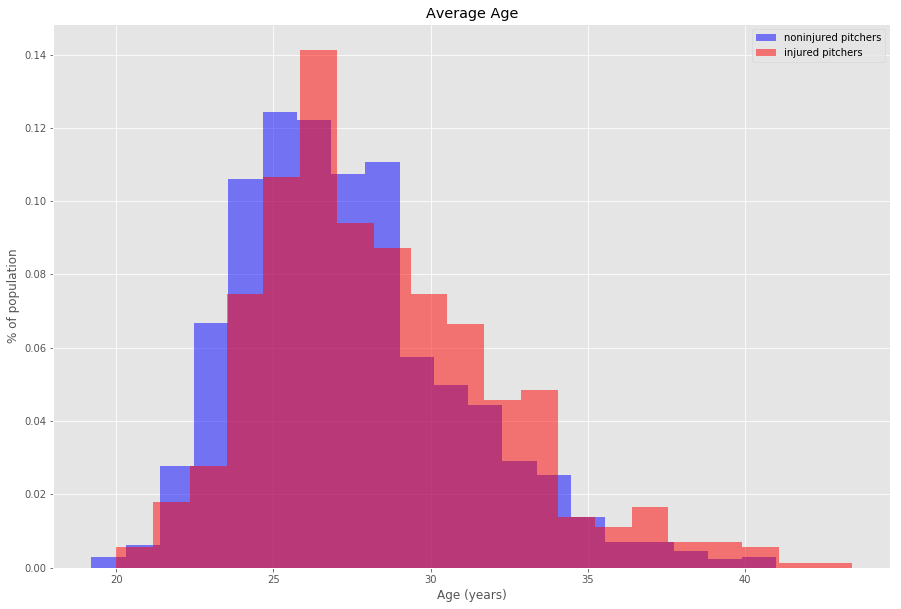

In [58]:
fig, ax = plt.subplots(figsize = (15,10))

plt.hist(avg_noinj['age'], bins=20, alpha=.5, color='b', density=True)
plt.hist(avg_inj['age'], bins=20, alpha=.5, color='r', density=True)
ax.legend(['noninjured pitchers', 'injured pitchers'])
plt.title('Average Age')
plt.xlabel('Age (years)')
plt.ylabel('% of population')
plt.show()

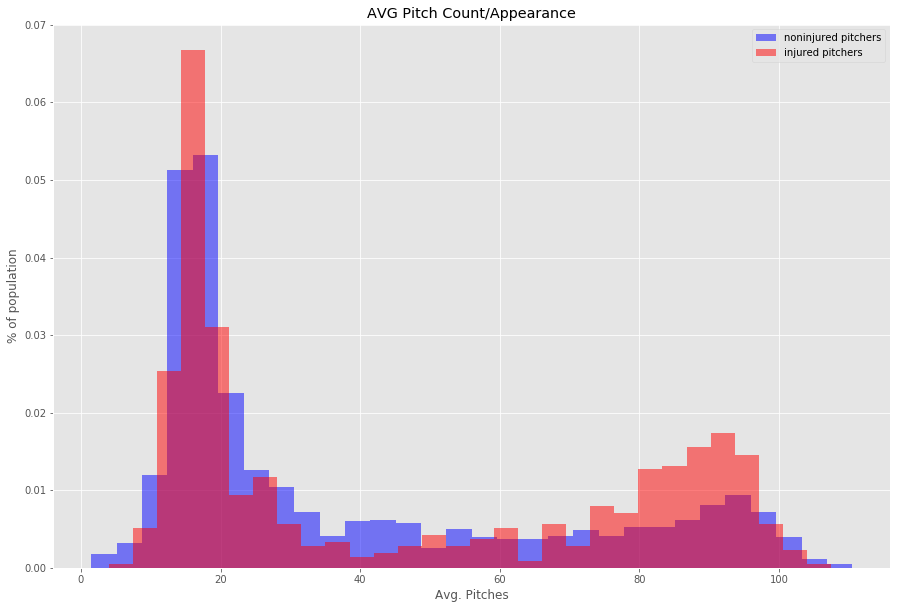

In [61]:
fig, ax = plt.subplots(figsize = (15,10))

plt.hist(avg_noinj['pit'], bins=30, alpha=.5, color='b', density=True)
plt.hist(avg_inj['pit'], bins=30, alpha=.5, color='r', density=True)
ax.legend(['noninjured pitchers', 'injured pitchers'])
plt.title('AVG Pitch Count/Appearance')
plt.xlabel('Avg. Pitches')
plt.ylabel('% of population')
plt.show()

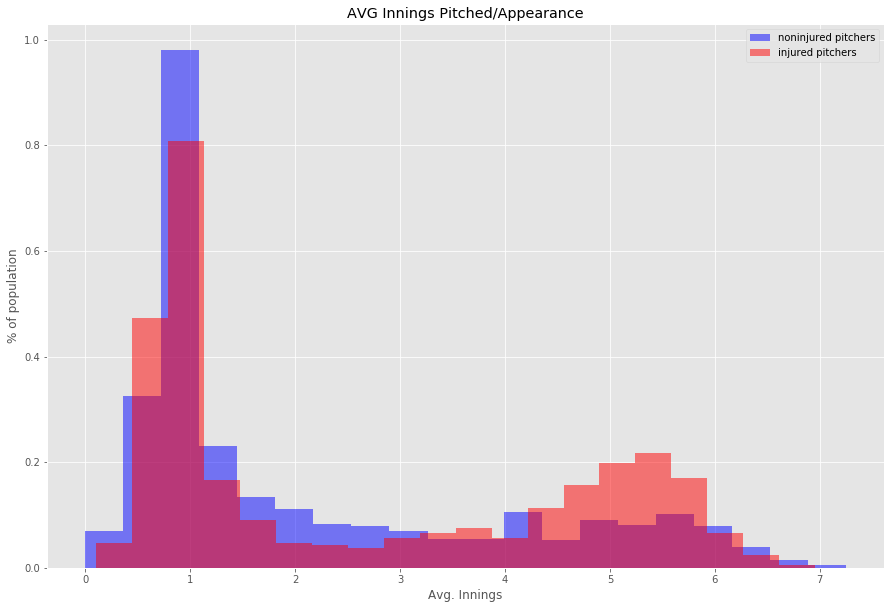

In [60]:
fig, ax = plt.subplots(figsize = (15,10))

plt.hist(avg_noinj['ip'], bins=20, alpha=.5, color='b', density=True)
plt.hist(avg_inj['ip'], bins=20, alpha=.5, color='r', density=True)
ax.legend(['noninjured pitchers', 'injured pitchers'])
plt.title('AVG Innings Pitched/Appearance')
plt.xlabel('Avg. Innings')
plt.ylabel('% of population')
plt.show()

In [19]:
df_15

,#days,2b,3b,ab,age,appearance_yr,babip,bb,bf,cs,date,days,days_preceeding,days_rest,enddate,er,era,first_x,first_y,g,gb/fb,gdp,gs,h,hbp,hr,ibb,injured?,injury,ip,key_bbref_x,key_bbref_y,key_fangraphs_x,key_fangraphs_y,key_mlbam,key_retro_x,key_retro_y,l,last_x,last_y,ld,lev,list,mlb_played_first_x,mlb_played_first_y,mlb_played_last_x,mlb_played_last_y,moneyearned,name_first_x,name_first_y,name_last_x,name_last_y,name_x,name_y,pit,po,posititon,pu,r,sb,sf,so,so/w,so9,startdate,stl,str,sts,sv,team,tm,w,whip,year
0,1460.0,0.0,0.0,22.0,42.0,1,0.154,1.0,23.0,0.0,2015-04-06,NaN,792,182.0,NaN,1.0,1.50,bartolocolon,NaN,1.0,0.64,0.0,1.0,3.0,0.0,1.0,0.0,0.0,NaN,6.0,colonba01,NaN,375.0,NaN,112526.0,colob001,NaN,NaN,bartolocolon,NaN,0.07,MLB-NL,NaN,1997.0,NaN,2018.0,NaN,NaN,bartolo,NaN,colon,NaN,bartolocolon,NaN,86.0,0.0,NaN,0.07,1.0,0.0,0.0,8.0,8.00,12.0,2017-06-06,0.21,0.69,0.15,NaN,NaN,New York,1.0,0.667,NaN
1,1454.0,1.0,1.0,27.0,42.0,2,0.238,0.0,27.0,0.0,2015-04-12,NaN,786,6.0,NaN,3.0,3.86,bartolocolon,NaN,1.0,0.33,0.0,1.0,6.0,0.0,1.0,0.0,0.0,NaN,7.0,colonba01,NaN,375.0,NaN,112526.0,colob001,NaN,NaN,bartolocolon,NaN,0.33,MLB-NL,NaN,1997.0,NaN,2018.0,NaN,NaN,bartolo,NaN,colon,NaN,bartolocolon,NaN,77.0,0.0,NaN,0.05,3.0,0.0,0.0,5.0,NaN,6.4,2017-06-06,0.21,0.78,0.06,NaN,NaN,New York,1.0,0.857,NaN
2,1449.0,2.0,0.0,26.0,42.0,3,0.250,0.0,26.0,0.0,2015-04-17,NaN,781,5.0,NaN,1.0,1.29,bartolocolon,NaN,1.0,0.43,1.0,1.0,6.0,0.0,1.0,0.0,0.0,NaN,7.0,colonba01,NaN,375.0,NaN,112526.0,colob001,NaN,NaN,bartolocolon,NaN,0.29,MLB-NL,NaN,1997.0,NaN,2018.0,NaN,NaN,bartolo,NaN,colon,NaN,bartolocolon,NaN,91.0,0.0,NaN,0.05,1.0,0.0,0.0,5.0,NaN,6.4,2017-06-06,0.21,0.73,0.05,NaN,NaN,New York,1.0,0.857,NaN
3,1443.0,2.0,0.0,23.0,42.0,4,0.368,0.0,24.0,1.0,2015-04-23,NaN,775,6.0,NaN,3.0,4.50,bartolocolon,NaN,1.0,0.22,1.0,1.0,7.0,0.0,0.0,0.0,0.0,NaN,6.0,colonba01,NaN,375.0,NaN,112526.0,colob001,NaN,NaN,bartolocolon,NaN,0.33,MLB-NL,NaN,1997.0,NaN,2018.0,NaN,NaN,bartolo,NaN,colon,NaN,bartolocolon,NaN,88.0,0.0,NaN,0.11,3.0,0.0,1.0,5.0,NaN,7.5,2017-06-06,0.23,0.66,0.07,NaN,NaN,New York,1.0,1.167,NaN
4,1437.0,2.0,0.0,26.0,42.0,5,0.333,0.0,29.0,0.0,2015-04-29,NaN,769,6.0,NaN,4.0,5.40,bartolocolon,NaN,1.0,0.48,1.0,1.0,9.0,0.0,1.0,0.0,0.0,NaN,6.2,colonba01,NaN,375.0,NaN,112526.0,colob001,NaN,1.0,bartolocolon,NaN,0.28,MLB-NL,NaN,1997.0,NaN,2018.0,NaN,NaN,bartolo,NaN,colon,NaN,bartolocolon,NaN,91.0,0.0,NaN,0.04,4.0,0.0,1.0,2.0,NaN,2.7,2017-06-06,0.26,0.70,0.03,NaN,NaN,New York,NaN,1.350,NaN
5,1431.0,0.0,0.0,29.0,42.0,6,0.263,0.0,29.0,0.0,2015-05-05,NaN,763,6.0,NaN,1.0,1.17,bartolocolon,NaN,1.0,0.30,0.0,1.0,6.0,0.0,1.0,0.0,0.0,NaN,7.2,colonba01,NaN,375.0,NaN,112526.0,colob001,NaN,NaN,bartolocolon,NaN,0.35,MLB-NL,NaN,1997.0,NaN,2018.0,NaN,NaN,bartolo,NaN,colon,NaN,bartolocolon,NaN,97.0,0.0,NaN,0.15,1.0,0.0,0.0,9.0,NaN,10.6,2017-06-06,0.27,0.73,0.08,NaN,NaN,New York,1.0,0.783,NaN
6,1426.0,3.0,0.0,26.0,42.0,7,0.368,0.0,26.0,0.0,2015-05-10,NaN,758,5.0,NaN,4.0,6.00,bartolocolon,NaN,1.0,0.35,0.0,1.0,8.0,0.0,1.0,0.0,0.0,NaN,6.0,colonba01,NaN,375.0,NaN,112526.0,colob001,NaN,NaN,bartolocolon,NaN,0.25,MLB-NL,NaN,1997.0,NaN,2018.0,NaN,NaN,bartolo,NaN,colon,NaN,bartolocolon,NaN,92.0,0.0,NaN,0.00,4.0,0.0,0.0,6.0,NaN,9.0,2017-06-06,0.21,0.75,0.08,NaN,NaN,New York,1.0,1.333,NaN
7,1421.0,4.0,0.0,23.0,42.0,8,0.263,0.0,23.0,0.0,2015-05-15,NaN,753,5.0,NaN,5.0,9.00,bartolocolon,NaN,1.0,0.48,0.0,1.0,7.0,0.0,2.0,0.0,0.0,NaN,5.0,colonba01,NaN,375.0,NaN,112526.0,colob001,NaN,1.0,bartolocolon,NaN,0.19,MLB-NL,NaN,1997.0,NaN,2018.0,NaN,NaN,bartolo,NaN,colon,NaN,bartolocolon,NaN,62.0,0.0,NaN,0.00,6.0,0.0,0.0,2.0,NaN,3.6,2017-06-06,0.26,0.84,0.03,NaN,NaN,New York,NaN,1.400,NaN
8,1416.0,2.0,0.0,24.0,42.0,9,0.500,2.0,27.0,0.0,2015-05-20,NaN,748,5.0,NaN,8.0,16.62,bartolocolon,NaN,1.0,0.35,0.0,1.0,11.0,0.0,2.0,0.0,0.0,NaN,4.1,colonba01,NaN,375.0,NaN,112526.0,colob001,NaN,1.0,bartolocolon,NaN,0.30,MLB-NL,NaN,1997.0,NaN,2018.0,NaN,NaN,bartolo,NaN,colon,NaN,bartolocolon,NaN,86.0,0.0,NaN,0.05,9.0,0.0,0.0,4.0,2.00,

In [26]:
conn = psycopg2.connect(dbname='statcast', user='taylorphillips', host='localhost')
cur = conn.cursor()

return_frame = pd.DataFrame()

id_list = df_15['key_mlbam'].unique().tolist()

for id in id_list:
    fastballs = psql.read_sql('''
    SELECT COUNT(pitch_type) as {0}_count, game_date as date, p_throws, AVG(release_speed) as {0}_release_speed,
    AVG(effective_speed) as {0}_percieved_speed, AVG(release_spin_rate) as {0}_spin_rate, 
    AVG(release_pos_x) as {0}_avg_x, AVG(release_pos_z) as {0}_avg_z, AVG(release_extension) as {0}_avg_extension,
    AVG(pfx_x) as {0}_x_movement, AVG(pfx_z) as {0}_z_movement 
    FROM pitches 
    WHERE pitcher = {1} AND pitch_type IN ('FF','FT', 'SI') AND game_date >= '2015-03-01' AND game_date <= '2015-11-01'
    GROUP BY date, p_throws
    ORDER BY date
    '''.format('fb', id), conn)
    
    offspeed = psql.read_sql('''
    SELECT COUNT(pitch_type) as {0}_count, game_date as date, p_throws, AVG(release_speed) as {0}_release_speed,
    AVG(effective_speed) as {0}_percieved_speed, AVG(release_spin_rate) as {0}_spin_rate, 
    AVG(release_pos_x) as {0}_avg_x, AVG(release_pos_z) as {0}_avg_z, AVG(release_extension) as {0}_avg_extension,
    AVG(pfx_x) as {0}_x_movement, AVG(pfx_z) as {0}_z_movement 
    FROM pitches 
    WHERE pitcher = {1} AND pitch_type IN ('FC', 'SL', 'FS', 'CH', 'KC', 'CU', 'FO', 'KN', 'SC', 'EP')
    AND game_date >= '2015-03-01' AND game_date <= '2015-11-01'
    GROUP BY date, p_throws
    ORDER BY date
    '''.format('os', id), conn)
    
    frame = df_15[df_15['key_mlbam'] == id]
    
    fb_frame = frame.merge(fastballs, on='date', how='left')
    merge_frame = fb_frame.merge(offspeed, on='date', how='left')
    return_frame = return_frame.append(merge_frame)

In [29]:
print(len(df_15))
print(len(return_frame))
return_frame

19945
20004


,#days,2b,3b,ab,age,appearance_yr,babip,bb,bf,cs,date,days,days_preceeding,days_rest,enddate,er,era,first_x,first_y,g,gb/fb,gdp,gs,h,hbp,hr,ibb,injured?,injury,ip,key_bbref_x,key_bbref_y,key_fangraphs_x,key_fangraphs_y,key_mlbam,key_retro_x,key_retro_y,l,last_x,last_y,ld,lev,list,mlb_played_first_x,mlb_played_first_y,mlb_played_last_x,mlb_played_last_y,moneyearned,name_first_x,name_first_y,name_last_x,name_last_y,name_x,name_y,pit,po,posititon,pu,r,sb,sf,so,so/w,so9,startdate,stl,str,sts,sv,team,tm,w,whip,year,fb_count,p_throws_x,fb_release_speed,fb_percieved_speed,fb_spin_rate,fb_avg_x,fb_avg_z,fb_avg_extension,fb_x_movement,fb_z_movement,os_count,p_throws_y,os_release_speed,os_percieved_speed,os_spin_rate,os_avg_x,os_avg_z,os_avg_extension,os_x_movement,os_z_movement
0,1460.0,0.0,0.0,22.0,42.0,1,0.154,1.0,23.0,0.0,2015-04-06,NaN,792,182.0,NaN,1.0,1.50,bartolocolon,NaN,1.0,0.64,0.0,1.0,3.0,0.0,1.0,0.0,0.0,NaN,6.0,colonba01,NaN,375.0,NaN,112526.0,colob001,NaN,NaN,bartolocolon,NaN,0.07,MLB-NL,NaN,1997.0,NaN,2018.0,NaN,NaN,bartolo,NaN,colon,NaN,bartolocolon,NaN,86.0,0.0,NaN,0.07,1.0,0.0,0.0,8.0,8.00,12.0,2017-06-06,0.21,0.69,0.15,NaN,NaN,New York,1.0,0.667,NaN,76,R,89.7842,88.2026,2280.71,-1.48172,5.91654,5.60574,-1.02622,1.27685,10,R,83.54,81.5966,2469.44,-1.73399,5.99212,5.26267,0.0466025,0.628567
1,1454.0,1.0,1.0,27.0,42.0,2,0.238,0.0,27.0,0.0,2015-04-12,NaN,786,6.0,NaN,3.0,3.86,bartolocolon,NaN,1.0,0.33,0.0,1.0,6.0,0.0,1.0,0.0,0.0,NaN,7.0,colonba01,NaN,375.0,NaN,112526.0,colob001,NaN,NaN,bartolocolon,NaN,0.33,MLB-NL,NaN,1997.0,NaN,2018.0,NaN,NaN,bartolo,NaN,colon,NaN,bartolocolon,NaN,77.0,0.0,NaN,0.05,3.0,0.0,0.0,5.0,NaN,6.4,2017-06-06,0.21,0.78,0.06,NaN,NaN,New York,1.0,0.857,NaN,71,R,88.569,86.3274,2133.97,-1.16116,5.9567,5.04944,-0.843298,1.23725,6,R,82,80.0865,1761.83,-1.35745,6.00008,4.996,-0.546108,0.733678
2,1449.0,2.0,0.0,26.0,42.0,3,0.250,0.0,26.0,0.0,2015-04-17,NaN,781,5.0,NaN,1.0,1.29,bartolocolon,NaN,1.0,0.43,1.0,1.0,6.0,0.0,1.0,0.0,0.0,NaN,7.0,colonba01,NaN,375.0,NaN,112526.0,colob001,NaN,NaN,bartolocolon,NaN,0.29,MLB-NL,NaN,1997.0,NaN,2018.0,NaN,NaN,bartolo,NaN,colon,NaN,bartolocolon,NaN,91.0,0.0,NaN,0.05,1.0,0.0,0.0,5.0,NaN,6.4,2017-06-06,0.21,0.73,0.05,NaN,NaN,New York,1.0,0.857,NaN,76,R,89.2461,87.102,2193.35,-1.29515,6.12479,5.37295,-1.08747,1.03818,15,R,82.94,80.8483,1817.46,-1.52015,6.10517,5.2042,-0.449991,0.594358
3,1443.0,2.0,0.0,23.0,42.0,4,0.368,0.0,24.0,1.0,2015-04-23,NaN,775,6.0,NaN,3.0,4.50,bartolocolon,NaN,1.0,0.22,1.0,1.0,7.0,0.0,0.0,0.0,0.0,NaN,6.0,colonba01,NaN,375.0,NaN,112526.0,colob001,NaN,NaN,bartolocolon,NaN,0.33,MLB-NL,NaN,1997.0,NaN,2018.0,NaN,NaN,bartolo,NaN,colon,NaN,bartolocolon,NaN,88.0,0.0,NaN,0.11,3.0,0.0,1.0,5.0,NaN,7.5,2017-06-06,0.23,0.66,0.07,NaN,NaN,New York,1.0,1.167,NaN,80,R,89.025,86.7799,2196.47,-1.22738,6.09687,5.24317,-1.29272,1.11685,11,R,81.9364,79.716,2036.36,-1.43826,6.18081,5.08982,-0.711843,0.584264
4,1437.0,2.0,0.0,26.0,42.0,5,0.333,0.0,29.0,0.0,2015-04-29,NaN,769,6.0,NaN,4.0,5.40,bartolocolon,NaN,1.0,0.48,1.0,1.0,9.0,0.0,1.0,0.0,0.0,NaN,6.2,colonba01,NaN,375.0,NaN,112526.0,colob001,NaN,1.0,bartolocolon,NaN,0.28,MLB-NL,NaN,1997.0,NaN,2018.0,NaN,NaN,bartolo,NaN,colon,NaN,bartolocolon,NaN,91.0,0.0,NaN,0.04,4.0,0.0,1.0,2.0,NaN,2.7,2017-06-06,0.26,0.70,0.03,NaN,NaN,New York,NaN,1.350,NaN,72,R,88.4625,86.0994,2192.56,-0.902362,6.5241,5.15831,-1.21026,1.22752,17,R,82.4765,79.9319,2331.31,-1.20868,6.4466,4.90069,-0.0175206,0.677131
5,1431.0,0.0,0.0,29.0,42.0,6,0.263,0.0,29.0,0.0,2015-05-05,NaN,763,6.0,NaN,1.0,1.17,bartolocolon,NaN,1.0,0.30,0.0,1.0,6.0,0.0,1.0,0.0,0.0,NaN,7.2,colonba01,NaN,375.0,NaN,112526.0,colob001,NaN,NaN,bartolocolon,NaN,0.35,MLB-NL,NaN,1997.0,NaN,2018.0,NaN,NaN,bartolo,NaN,colon,NaN,bartolocolon,NaN,97.0,0.0,NaN,0.15,1.0,0.0,0.0,9.0,NaN,10.6,2017-06-06,0.27,0.73,0.08,NaN,NaN,New York,1.0,0.783,NaN,75,R,88.4733,86.1686,2127.81,-1.32471,6.09052,5.34588,-1.25803,0.782793,22,R,82.8591,80.5772,2202.27,-1.46256,6.19927,5.15359,-0.258982,0.475265
6,1426.0,

In [30]:
right = []
left = []

for index, row in return_frame.iterrows():
    if row.p_throws_x == 'R':
        right.append(row.key_mlbam)
    if row.p_throws_x == 'L':
        left.append(row.key_mlbam)
set(right).intersection(set(left))

{519381.0}

In [31]:
return_frame[return_frame['key_mlbam'] == 519381.0]

,#days,2b,3b,ab,age,appearance_yr,babip,bb,bf,cs,date,days,days_preceeding,days_rest,enddate,er,era,first_x,first_y,g,gb/fb,gdp,gs,h,hbp,hr,ibb,injured?,injury,ip,key_bbref_x,key_bbref_y,key_fangraphs_x,key_fangraphs_y,key_mlbam,key_retro_x,key_retro_y,l,last_x,last_y,ld,lev,list,mlb_played_first_x,mlb_played_first_y,mlb_played_last_x,mlb_played_last_y,moneyearned,name_first_x,name_first_y,name_last_x,name_last_y,name_x,name_y,pit,po,posititon,pu,r,sb,sf,so,so/w,so9,startdate,stl,str,sts,sv,team,tm,w,whip,year,fb_count,p_throws_x,fb_release_speed,fb_percieved_speed,fb_spin_rate,fb_avg_x,fb_avg_z,fb_avg_extension,fb_x_movement,fb_z_movement,os_count,p_throws_y,os_release_speed,os_percieved_speed,os_spin_rate,os_avg_x,os_avg_z,os_avg_extension,os_x_movement,os_z_movement
0,1400.0,0.0,0.0,6.0,30.0,1,0.200,0.0,6.0,0.0,2015-06-05,NaN,0,182.0,NaN,0.0,0.000000,patvenditte,NaN,1.0,0.80,1.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,2.0,vendipa01,NaN,7108.0,NaN,519381.0,vendp001,NaN,NaN,patvenditte,NaN,0.00,MLB-AL,NaN,2015.0,NaN,2018.0,NaN,NaN,pat,NaN,venditte,NaN,patvenditte,NaN,28.0,0.0,NaN,0.00,0.0,0.0,0.0,1.0,NaN,4.5,2015-06-05,0.21,0.64,0.11,NaN,NaN,Oakland,NaN,0.500,NaN,2,L,83.5,82.922,2557,3.08605,4.1066,6.0095,1.07936,0.94175,5,L,72.58,71.4114,2933.6,3.16918,3.88194,5.7812,-1.25669,0.582127
1,1400.0,0.0,0.0,6.0,30.0,1,0.200,0.0,6.0,0.0,2015-06-05,NaN,0,182.0,NaN,0.0,0.000000,patvenditte,NaN,1.0,0.80,1.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,2.0,vendipa01,NaN,7108.0,NaN,519381.0,vendp001,NaN,NaN,patvenditte,NaN,0.00,MLB-AL,NaN,2015.0,NaN,2018.0,NaN,NaN,pat,NaN,venditte,NaN,patvenditte,NaN,28.0,0.0,NaN,0.00,0.0,0.0,0.0,1.0,NaN,4.5,2015-06-05,0.21,0.64,0.11,NaN,NaN,Oakland,NaN,0.500,NaN,2,L,83.5,82.922,2557,3.08605,4.1066,6.0095,1.07936,0.94175,11,R,74.0818,74.2154,2738.73,-2.70489,4.11108,6.63864,1.37427,0.211988
2,1400.0,0.0,0.0,6.0,30.0,1,0.200,0.0,6.0,0.0,2015-06-05,NaN,0,182.0,NaN,0.0,0.000000,patvenditte,NaN,1.0,0.80,1.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,2.0,vendipa01,NaN,7108.0,NaN,519381.0,vendp001,NaN,NaN,patvenditte,NaN,0.00,MLB-AL,NaN,2015.0,NaN,2018.0,NaN,NaN,pat,NaN,venditte,NaN,patvenditte,NaN,28.0,0.0,NaN,0.00,0.0,0.0,0.0,1.0,NaN,4.5,2015-06-05,0.21,0.64,0.11,NaN,NaN,Oakland,NaN,0.500,NaN,10,R,87.32,88.2989,2352.6,-2.47151,4.28271,7.0236,-0.975855,1.09641,5,L,72.58,71.4114,2933.6,3.16918,3.88194,5.7812,-1.25669,0.582127
3,1400.0,0.0,0.0,6.0,30.0,1,0.200,0.0,6.0,0.0,2015-06-05,NaN,0,182.0,NaN,0.0,0.000000,patvenditte,NaN,1.0,0.80,1.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,2.0,vendipa01,NaN,7108.0,NaN,519381.0,vendp001,NaN,NaN,patvenditte,NaN,0.00,MLB-AL,NaN,2015.0,NaN,2018.0,NaN,NaN,pat,NaN,venditte,NaN,patvenditte,NaN,28.0,0.0,NaN,0.00,0.0,0.0,0.0,1.0,NaN,4.5,2015-06-05,0.21,0.64,0.11,NaN,NaN,Oakland,NaN,0.500,NaN,10,R,87.32,88.2989,2352.6,-2.47151,4.28271,7.0236,-0.975855,1.09641,11,R,74.0818,74.2154,2738.73,-2.70489,4.11108,6.63864,1.37427,0.211988
4,1398.0,0.0,0.0,1.0,30.0,2,0.000,0.0,1.0,0.0,2015-06-07,NaN,0,2.0,NaN,0.0,0.000000,patvenditte,NaN,1.0,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.1,vendipa01,NaN,7108.0,NaN,519381.0,vendp001,NaN,NaN,patvenditte,NaN,0.00,MLB-AL,NaN,2015.0,NaN,2018.0,NaN,NaN,pat,NaN,venditte,NaN,patvenditte,NaN,4.0,0.0,NaN,0.00,0.0,0.0,0.0,0.0,NaN,0.0,2015-06-07,0.25,0.75,0.00,NaN,NaN,Oakland,NaN,0.000,NaN,1,R,86.5,87.625,2385,-2.5184,4.3775,7.137,-0.607342,1.0514,3,R,73.5333,73.7733,2880.33,-2.70807,4.0533,6.70167,1.35955,0.177067
5,1396.0,0.0,0.0,3.0,30.0,3,0.000,0.0,3.0,0.0,2015-06-09,NaN,0,2.0,NaN,0.0,0.000000,patvenditte,NaN,1.0,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,vendipa01,NaN,7108.0,NaN,519381.0,vendp001,NaN,NaN,patvenditte,NaN,0.00,MLB-AL,NaN,2015.0,NaN,2018.0,NaN,NaN,pat,NaN,venditte,NaN,patvenditte,NaN,8.0,0.0,NaN,0.00,0.0,0.0,0.0,0.0,NaN,0.0,2015-06-09,0.25,0.75,0.00,NaN,NaN,Oakland,NaN,0.000,NaN,4,R,85.9,85.985,2334.25,-2.7158,4.4454,6.32275,-0.966044,1.08508,4,R,73.975,73.0327,2895.25,-2.9519,4.17607,5.983,1.58071,0.165242
6,1395.0,0.0,0.0,6.0,30.0,4,0.000,2.0,8.0,0.0,2015-06-10,NaN,0,1.0,NaN,0.0,0.000000,patvendit

Pat venditee pitches with both arms. 